# Initial Analysis

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Part I: EDA Part

In [2]:
with open('yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    # into dataframe
    data = [json.loads(line) for line in f]
    df = pd.DataFrame(data)
# close
f.close()

df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [4]:
print(df['user_id'].nunique())

print(df['business_id'].nunique())

1987929
150346


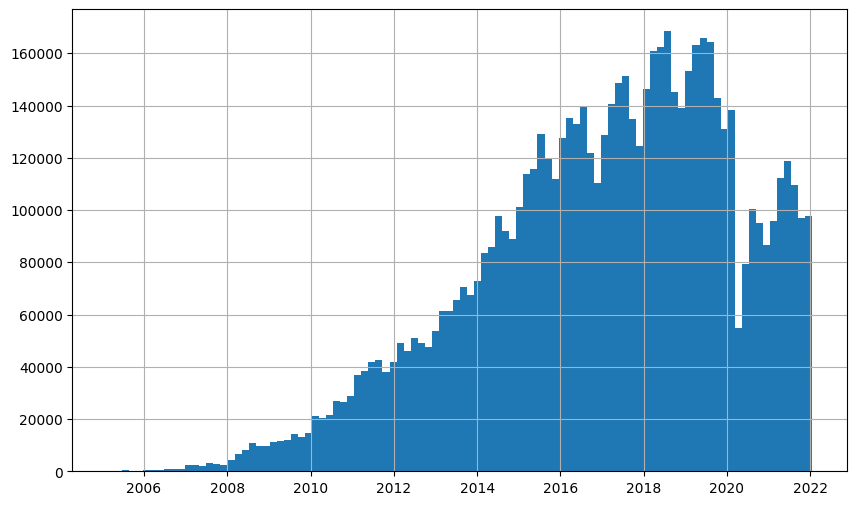

In [5]:
# change date to datetime and plot distribution
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(10, 6))
hist = df['date'].hist(bins=100)

In [6]:
df_2020 = df[(df['date'] > '2020-01-01') & (df['date'] < '2021-01-01')]

In [7]:
df_2020['user_id'].nunique()

283781

In [8]:
df_2020['business_id'].nunique()

89967

In [9]:
df_2020.groupby('user_id').size().sort_values(ascending=False)[:20]

user_id
Sp2GV7D-_JLZMPQmDanzPQ    216
qT1-N9hjbyjMW4Mvq4uU4w    208
vmUqcqMjlWoBM6qfmUXgyQ    201
AEowRtLGb_AdqFAZ8e6C9A    185
R9IJ1Byr27n6wXj3QvJ2Lg    173
fr1Hz2acAb3OaL3l6DyKNg    167
R7NM7vIyUfSTXvMsw7jNTA    155
leMOR7VSm5z-0r60iJ90EA    155
WwulXySQN8t2hwqH_yWurA    154
nWRDqA-XXdju1jOMnN7QcA    151
98jv8gu7kAwa2WzIPdw6-w    144
vHc-UrI9yfL_pnnc6nJtyQ    143
EryvaUTsMnk26eiauFWapQ    135
qzquNJ5YJiidnry19rdN0w    134
i_DR3vdE73nVm2GlMbGpGA    134
vffKQc_WQMYFGY4JS5VAOw    126
vFd8aBLg1kFcd0kCkoi-xw    126
kauJmG3ZiA-m5u0nPrjb4g    125
xZ8o-lOcU9M06dfpPKMdsw    125
wXdbkFZsfDR7utJvbWElyA    124
dtype: int64

In [10]:
with open('yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    # into dataframe
    data = [json.loads(line) for line in f]
    df_business = pd.DataFrame(data)
# close 
f.close()

df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [11]:
df_business.shape

(150346, 14)

In [12]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

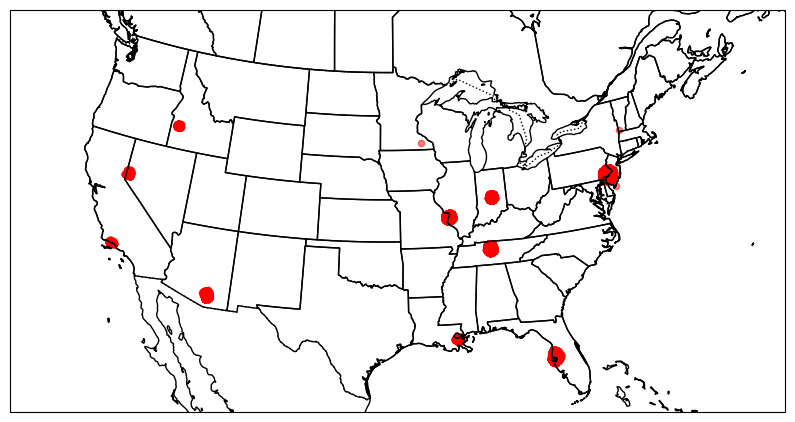

In [14]:
# draw map on the US based on the longitude and latitude of the business
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES)
ax.scatter(df_business['longitude'], df_business['latitude'], s=20, color='red', transform=ccrs.PlateCarree(), alpha=0.5)
plt.show()


In [15]:
df_business['city'].value_counts()

city
Philadelphia               14569
Tucson                      9250
Tampa                       9050
Indianapolis                7540
Nashville                   6971
                           ...  
Apopka                         1
Fallsington                    1
Chattanooga                    1
WILLOW GROVE                   1
Clearwater/ Countryside        1
Name: count, Length: 1416, dtype: int64

In [16]:
df_business['attributes'][5]

{'BusinessParking': 'None',
 'BusinessAcceptsCreditCards': 'True',
 'RestaurantsAttire': "u'casual'",
 'OutdoorSeating': 'True',
 'RestaurantsReservations': 'False',
 'Caters': 'False',
 'RestaurantsTakeOut': 'True',
 'Alcohol': "u'none'",
 'Ambience': 'None',
 'GoodForKids': 'True',
 'RestaurantsPriceRange2': '1',
 'ByAppointmentOnly': 'False',
 'CoatCheck': 'False',
 'DogsAllowed': 'False',
 'RestaurantsTableService': 'False',
 'RestaurantsGoodForGroups': 'True',
 'RestaurantsDelivery': 'True',
 'WiFi': "u'no'",
 'WheelchairAccessible': 'True',
 'HasTV': 'True',
 'HappyHour': 'False',
 'DriveThru': 'True',
 'BikeParking': 'False'}

In [17]:
x = df_business['attributes'].apply(lambda x: x.get('RestaurantsReservations', None) if x else None)
x.value_counts()

attributes
False    30105
True     14854
None       288
Name: count, dtype: int64

In [18]:
# extract only businesses in Philadelphia
df_philadelphia = df_business[df_business['city'] == 'Philadelphia']

In [19]:
# join tables df_2020 and df_philadelphia by business_id
df_2020 = df_2020.merge(df_philadelphia, on='business_id')
df_2020.shape

(50203, 22)

In [20]:
df_2020['user_id'].value_counts()

user_id
kauJmG3ZiA-m5u0nPrjb4g    120
vFd8aBLg1kFcd0kCkoi-xw    119
_cRADNksh9fa_lrm_UnOuQ    108
ET8n-r7glWYqZhuR6GcdNw    106
BXBtET2Kk7MmsqEXYySXtg     73
                         ... 
vDkGsNnO7RAfaZ9qEPXFYg      1
gD27PDtTzf4jLo-ZTWIDVA      1
Z4uuYTlSq0vGV9M5dvXuig      1
LV-7j98okmkBOeE-EA3RwQ      1
q1K82JmdDeefzfcMRtuOTg      1
Name: count, Length: 27657, dtype: int64

In [21]:
df_2020.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

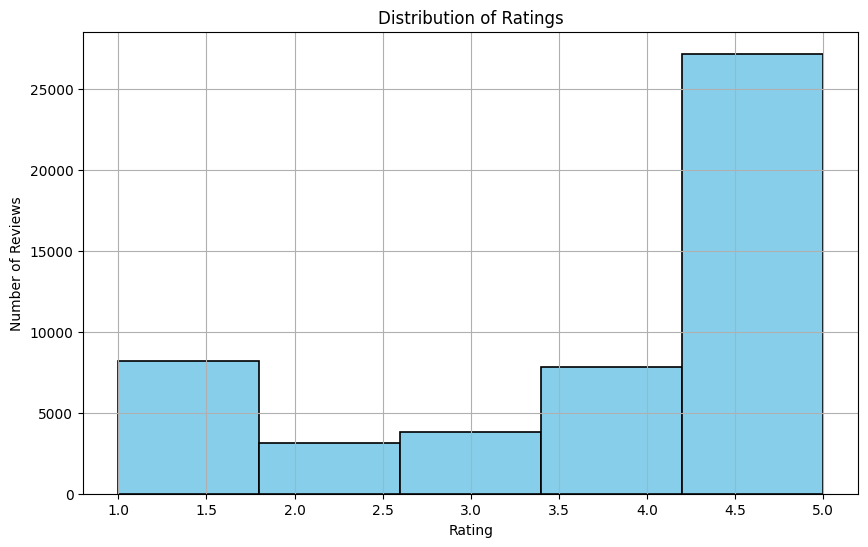

In [22]:
# draw distribution of ratings
plt.figure(figsize=(10, 6))
df_2020['stars_x'].hist(bins=5, color='skyblue', edgecolor='black', linewidth=1.2)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.show()

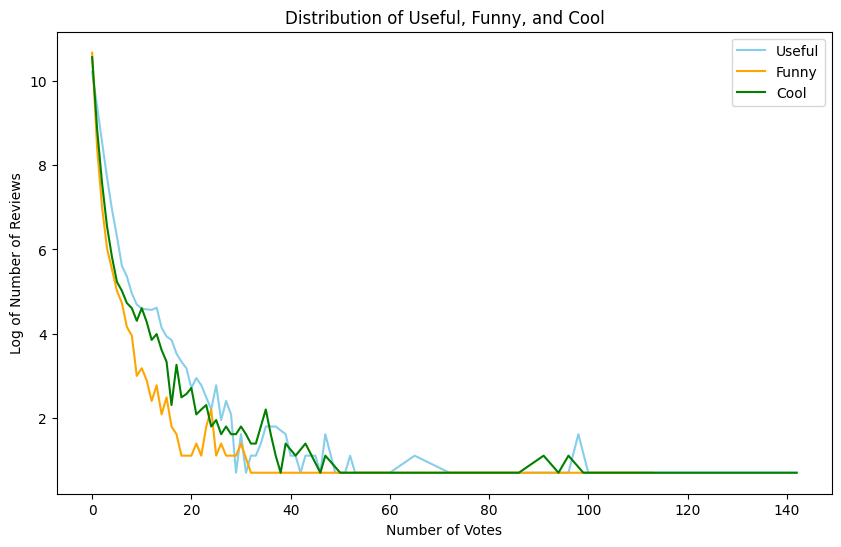

In [23]:
# draw distribution of useful, funny, and cool (less than 20)
plt.figure(figsize=(10, 6))
useful_count = df_2020['useful'].value_counts().sort_index()
funny_count = df_2020['funny'].value_counts().sort_index()
cool_count = df_2020['cool'].value_counts().sort_index()

# take log
useful_count_log = np.log(useful_count+1)
funny_count_log = np.log(funny_count+1)
cool_count_log = np.log(cool_count+1)

# plot
useful_count_log.plot(label='Useful', color='skyblue')
funny_count_log.plot(label='Funny', color='orange')
cool_count_log.plot(label='Cool', color='green')
plt.xlabel('Number of Votes')
plt.ylabel('Log of Number of Reviews')
plt.title('Distribution of Useful, Funny, and Cool')
plt.legend()

plt.show()


In [24]:
df_2020.to_csv('yelp_2020.csv', index=False)